In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

First lets take our cement_strength dataset.

In [2]:
data = pd.read_csv("InputFile.csv")
data

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Data Description

In [3]:
data.describe(include="all")

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
data.isnull().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

In [5]:
import matplotlib.pyplot as plot

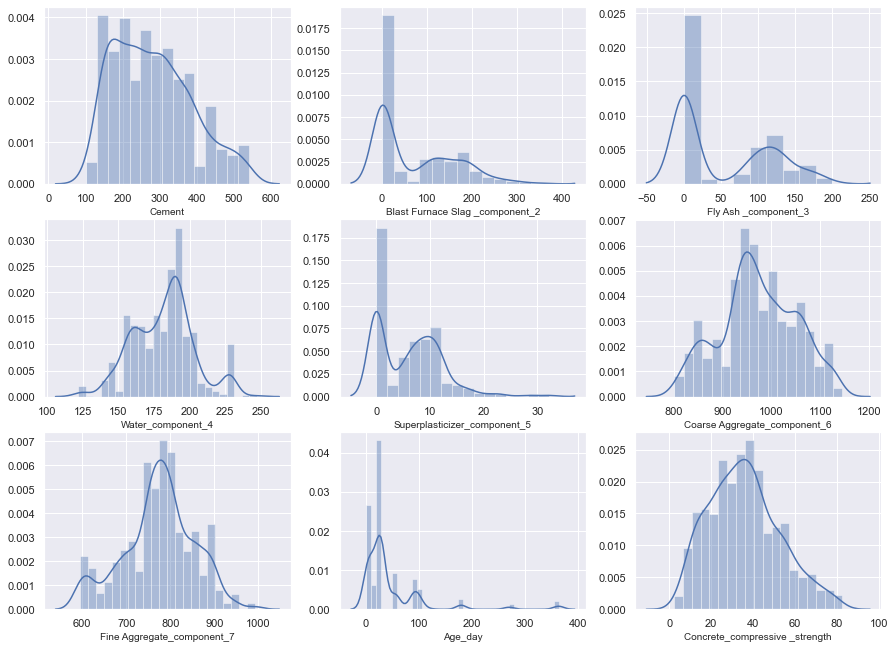

In [6]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in data.columns:
    ax = plot.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

### Data transformation

In [7]:
X = data.drop(["Concrete_compressive _strength"],axis=1)
Y = data['Concrete_compressive _strength']

In [8]:
X.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [9]:
Y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Concrete_compressive _strength, dtype: float64

Here we can see that there is no null values but there are some '0' present in the dataset, it can effect the calculation like in log.
so, we will add '1'(one) to whole data set's value, It will not change the meaning of dataset because we are adding 1 to each value.

In [10]:
for i in X.columns:
    #print(X[i])
    X[i]+=1
    X[i] = np.log(X[i])

In [11]:
X.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,6.293419,0.000000,0.0,5.093750,1.252763,6.947937,6.517671,3.367296
1,6.293419,0.000000,0.0,5.093750,1.252763,6.962243,6.517671,3.367296
2,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.602119
3,5.809643,4.966335,0.0,5.433722,0.000000,6.838405,6.388561,5.902633
4,5.296315,4.893352,0.0,5.262690,0.000000,6.886940,6.717200,5.888878


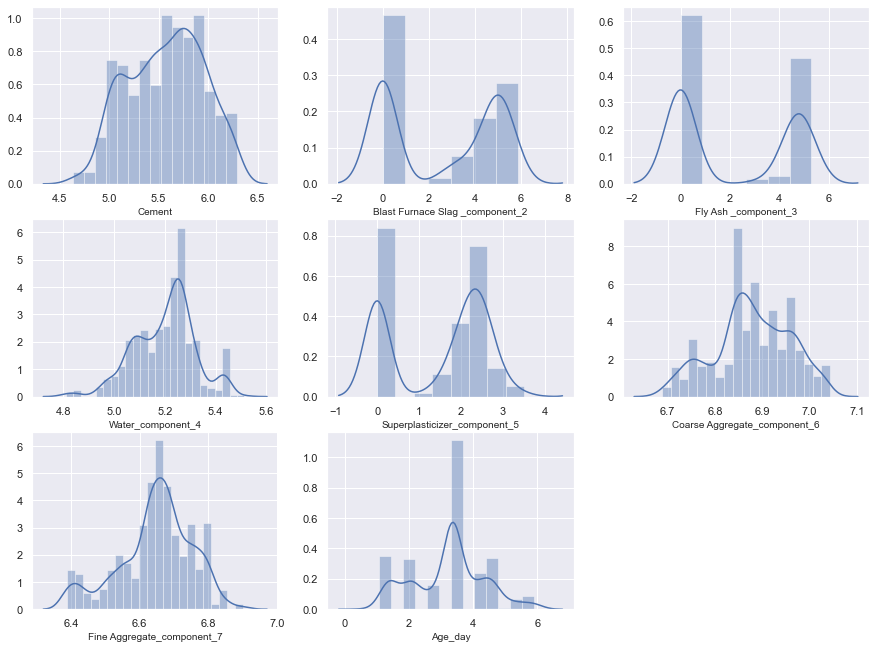

In [12]:
plot.figure(figsize=(15,15),facecolor='white')
plotnumber = 1

for column in X.columns:
    ax = plot.subplot(4,3,plotnumber) # subplots method provides a way to plot multiple plots on a single figure.
    sns.distplot(X[column])
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

now, lets have look on outliers

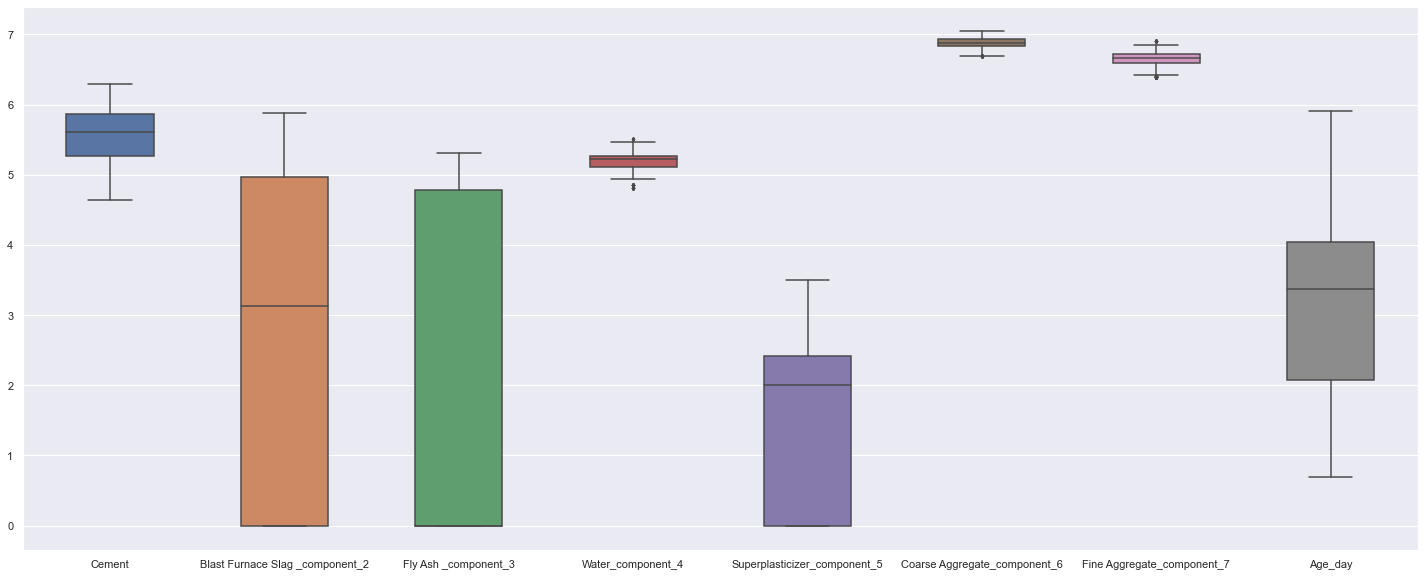

In [13]:
# let's see wheather their is outliers
fig, ax = plot.subplots(figsize=(25,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

Looking into the graph we can see that there is not that much outliers in the dataset so we can go on..

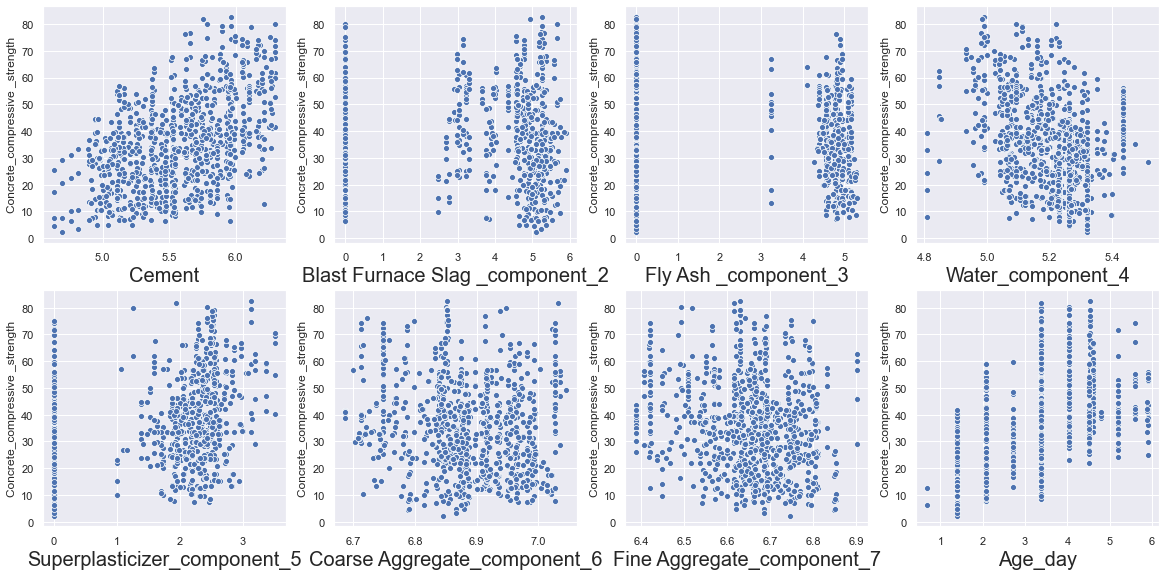

In [14]:
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')
plotnumber = 1

for i in X.columns:
    ax = plot.subplot(4,4,plotnumber)
    sns.scatterplot(X[i],Y)
    plot.xlabel(i,fontsize=20)
    plotnumber+=1
plot.show()

Well the relationship doesn't look particularly linear but we will try using Linear Regression and see how it works on our data. We will also use Random forest regressor and compare our results from both the models.

In [15]:
#lets check for correlation using heatmap

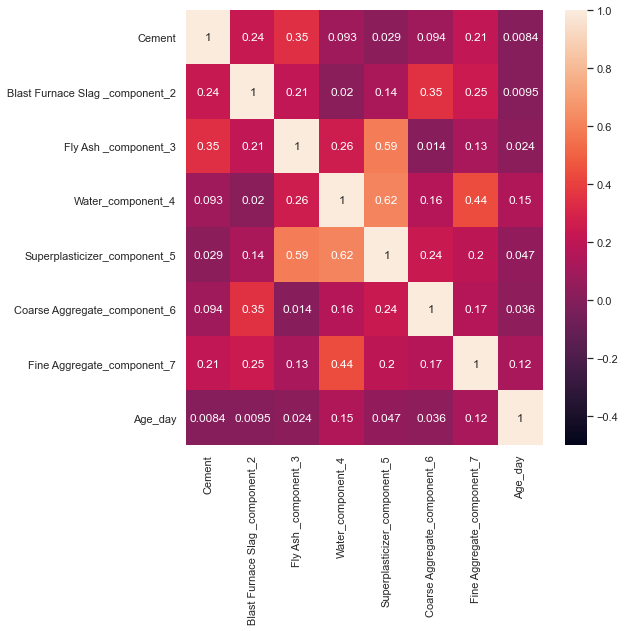

In [16]:
plot.figure(figsize=(8,8))
    #ax = plot.subplot(5,3,plotnumber)
sns.heatmap(X.corr().abs(), vmin = -0.5,vmax = 1,annot=True) # if annot is false number in the blocks are not visible. 

Great! none of our columns seem to be correlated.

In [17]:
#!pip install sklearn

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
Scaler = StandardScaler()

In [20]:
X = pd.DataFrame(Scaler.fit_transform(X),columns= X.columns, index=X.index)

In [21]:
X

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,1.901276,-1.059324,-0.900772,-0.897885,-0.175095,0.868136,-1.215655,0.112702
1,1.901276,-1.059324,-0.900772,-0.897885,-0.175095,1.046009,-1.215655,0.112702
2,0.625512,1.000837,-0.900772,1.970362,-1.260206,-0.493688,-2.431245,2.126253
3,0.625512,1.000837,-0.900772,1.970362,-1.260206,-0.493688,-2.431245,2.397013
4,-0.728181,0.970562,-0.900772,0.527414,-1.260206,0.109753,0.662939,2.384619
...,...,...,...,...,...,...,...,...
1025,0.139806,0.916146,1.000765,-0.032831,0.725528,-1.347202,-0.012306,0.112702
1026,0.542782,-1.059324,1.103800,0.700481,0.847727,-2.115505,0.524082,0.112702
1027,-1.490351,0.991777,1.077720,0.557958,0.437577,-1.032922,0.129808,0.112702
1028,-1.309704,1.112222,-0.900772,-0.221791,0.913544,0.251126,0.236493,0.112702


In [22]:
#X_test = pd.DataFrame(Scaler.fit_transform(X_test), columns= X_test.columns, index=X_test.index)

In [23]:
#X_test

Let's Create a clusters of Data sets

Before creating clusters we should know number of cluster so, for that we are using elbow method for getting cluster number.

In [24]:
from sklearn.cluster import KMeans

In [25]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=69)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

8240.0
6399.2025067845225
5464.1961995933825
4692.630088301158
4177.377675817775
3758.210255036353
3508.5606130721826
3304.7317064091444
3145.0524317610643
2966.255518231956


In [26]:
import matplotlib.pyplot as plt

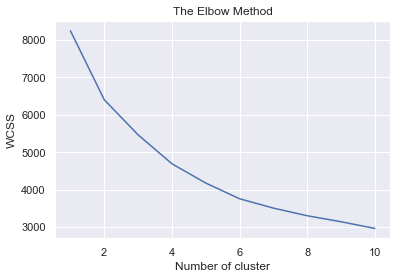

In [27]:
plt.plot(range(1,11),wcss)
plot.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

Let's take number of clusters as 5 or 4 Here I am taking 5

In [28]:
cluster = KMeans(n_clusters=5,init='k-means++',random_state=69)
Cluster_prediction = cluster.fit_predict(X)

In [29]:
print(Cluster_prediction)

[2 2 0 ... 3 0 3]


Here we are creating a column of cluster number in the data set and Labels

In [30]:
X['Cluster'] = Cluster_prediction
X['Label'] = Y
X.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Cluster,Label
0,1.901276,-1.059324,-0.900772,-0.897885,-0.175095,0.868136,-1.215655,0.112702,2,79.99
1,1.901276,-1.059324,-0.900772,-0.897885,-0.175095,1.046009,-1.215655,0.112702,2,61.89
2,0.625512,1.000837,-0.900772,1.970362,-1.260206,-0.493688,-2.431245,2.126253,0,40.27
3,0.625512,1.000837,-0.900772,1.970362,-1.260206,-0.493688,-2.431245,2.397013,0,41.05
4,-0.728181,0.970562,-0.900772,0.527414,-1.260206,0.109753,0.662939,2.384619,0,44.30


Sence, accuracy of the algorithms in different cluster may be different. 

#Now, We are seleceting 2 algorithms for this data set i.e 1.LinearReg
                                                          2.randomForestReg
#we will both this algo. to all 5 clusters and calculate accuracy and whichever will bw the best we will finalise it.

### for cluster 1

In [31]:
cluster1_data = X[X['Cluster']==1]

In [32]:
cluster1_features = cluster1_data.drop(['Cluster','Label'],axis=1)
cluster1_label = cluster1_data['Label']

In [33]:
cluster1_features

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
184,-0.431116,-1.059324,1.029305,0.408554,0.216403,-0.034530,1.159931,-1.672158
185,-0.431116,-1.059324,1.029305,0.408554,0.216403,-0.034530,1.159931,-0.481271
186,-0.431116,-1.059324,1.029305,0.408554,0.216403,-0.034530,1.159931,0.112702
187,-0.431116,-1.059324,1.029305,0.408554,0.216403,-0.034530,1.159931,0.721550
188,-0.431116,-1.059324,1.029305,0.408554,0.216403,-0.034530,1.159931,1.236978
...,...,...,...,...,...,...,...,...
976,0.338425,-1.059324,1.073471,-0.815475,1.013214,-0.214339,0.177906,0.112702
992,-1.578232,-1.059324,1.276999,-1.086306,1.285620,-0.351911,0.876929,0.112702
999,-1.448352,-1.059324,1.298019,-0.663092,0.934416,0.271192,0.035304,0.112702
1006,-1.220632,-1.059324,1.213817,0.060085,0.941264,0.667063,-0.507294,0.112702


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(cluster1_features,cluster1_label,test_size=1/3,random_state=69)

### let's first apply linear regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [37]:
linearReg = LinearRegression()

In [38]:
prams = {
    'fit_intercept':[True,False], 'copy_X':[True,False], 'normalize':[True,False]
}

grid = GridSearchCV(estimator=linearReg,param_grid=prams,verbose=3,cv=5,n_jobs=-1)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    5.3s finished


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=3)

In [39]:
best_fit_intercept = grid.best_params_['fit_intercept']
best_copy_X = grid.best_params_['copy_X']
best_normalize = grid.best_params_['normalize']

print(best_fit_intercept)
print(best_copy_X)
print(best_normalize)

True
True
False


so, now we got the best parems we will create a new model with best params.

In [40]:
lin_Reg = LinearRegression(fit_intercept=best_fit_intercept,normalize=best_normalize,copy_X=best_copy_X)
lin_Reg.fit(X_train,Y_train)

LinearRegression()

In [41]:
predict_lin_Reg = lin_Reg.predict(X_test)

In [42]:
from sklearn.metrics import r2_score,accuracy_score

In [43]:
LinearReg_error = r2_score(Y_test,predict_lin_Reg)
print(LinearReg_error)

0.8316537165735309


In [44]:
accuracy = accuracy_score(Y_test,predict_lin_Reg)
accuracy

ValueError: continuous is not supported

### error: It's because accuracy_score is for classification tasks only. For regression you should use something different, for example Score

### Socre is 0.831(i.e 83%) not so good let's try another algo.

### let's now apply random_forest

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
randomforest_params = {
    'n_estimators':[10,20,30],
    'max_features':['auto','sqrt','log2'], ## sqrt will reduce the features of dataset by squaring the features in shot
    'min_samples_split':[2,4,8], ## min number of data points placed in a node before the node is split
    'bootstrap':[True,False] ## method for sampling data points 
}

In [48]:
RFobj = RandomForestRegressor()
RFgrid = GridSearchCV(estimator=RFobj,param_grid=randomforest_params,verbose=1,cv=5)

In [52]:
RFgrid.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   13.6s finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 20, 30]},
             verbose=1)

In [58]:
best_n_estimators = RFgrid.best_params_['n_estimators']
best_max_features = RFgrid.best_params_['max_features']
best_min_samples_split = RFgrid.best_params_['min_samples_split']
best_bootstrap = RFgrid.best_params_['bootstrap']

print('best_n_estimators:',best_n_estimators)
print('best_max_features:',best_max_features)
print('best_min_samples_split:',best_min_samples_split)
print('best_bootstrap:',best_bootstrap)

best_n_estimators: 30
best_max_features: auto
best_min_samples_split: 4
best_bootstrap: True


In [55]:
RFpredict = RFgrid.predict(X_test)

In [56]:
RFscore = r2_score(Y_test,RFpredict)
print(RFscore)

0.8768554168973227


### Great our socre has increased from 0.83 to 0.87.

### Now let's try Bagging approch with linear regression

In [57]:
from sklearn.ensemble import BaggingRegressor

In [68]:
bgg_LR = BaggingRegressor(
                base_estimator=lin_Reg,
                n_estimators=20,
                bootstrap=True,
                random_state=69
)

In [69]:
bgg_LR.fit(X_train,Y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=20,
                 random_state=69)

In [72]:
score = bgg_LR.score(X_test,Y_test)
print(score)

0.8321899421514114


### Score is not so good as compair to other
In end to end project we will compair score of all algorithems/tecq. and then which ever's score is more we will apply that algorithem to that cluster.



## This was for one cluster we have to do this for all cluster.